In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
 
pylab.rcParams.update(params)

fsize, fdpi = (11,6), 150

## Discrete verdeling

In [2]:
S = np.array([8, 5, 6, 3, 6, 4, 3, 2, 7, 29, 7, 9, 2, 3, 5, 2])

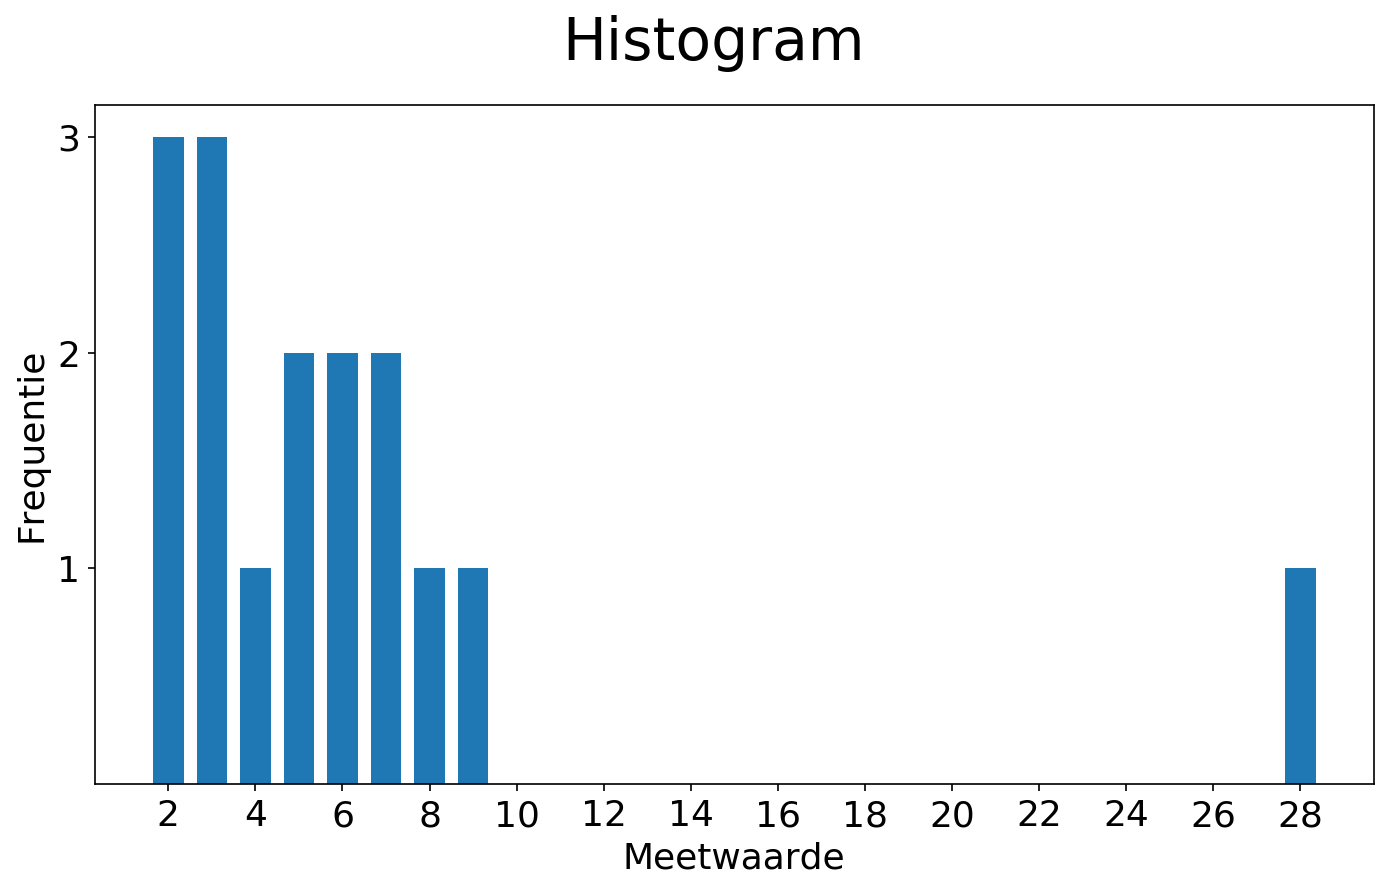

In [3]:
fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
plt.hist(S, bins=(max(S)-min(S)), rwidth=.7, align='left')

plt.xlabel("Meetwaarde")
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28])

plt.ylabel("Frequentie")
ytick_list = np.array([1,2,3])
plt.yticks(ytick_list)

fig.suptitle("Histogram", fontsize=28)

plt.savefig("png/discrete_verdeling.png")
plt.show()

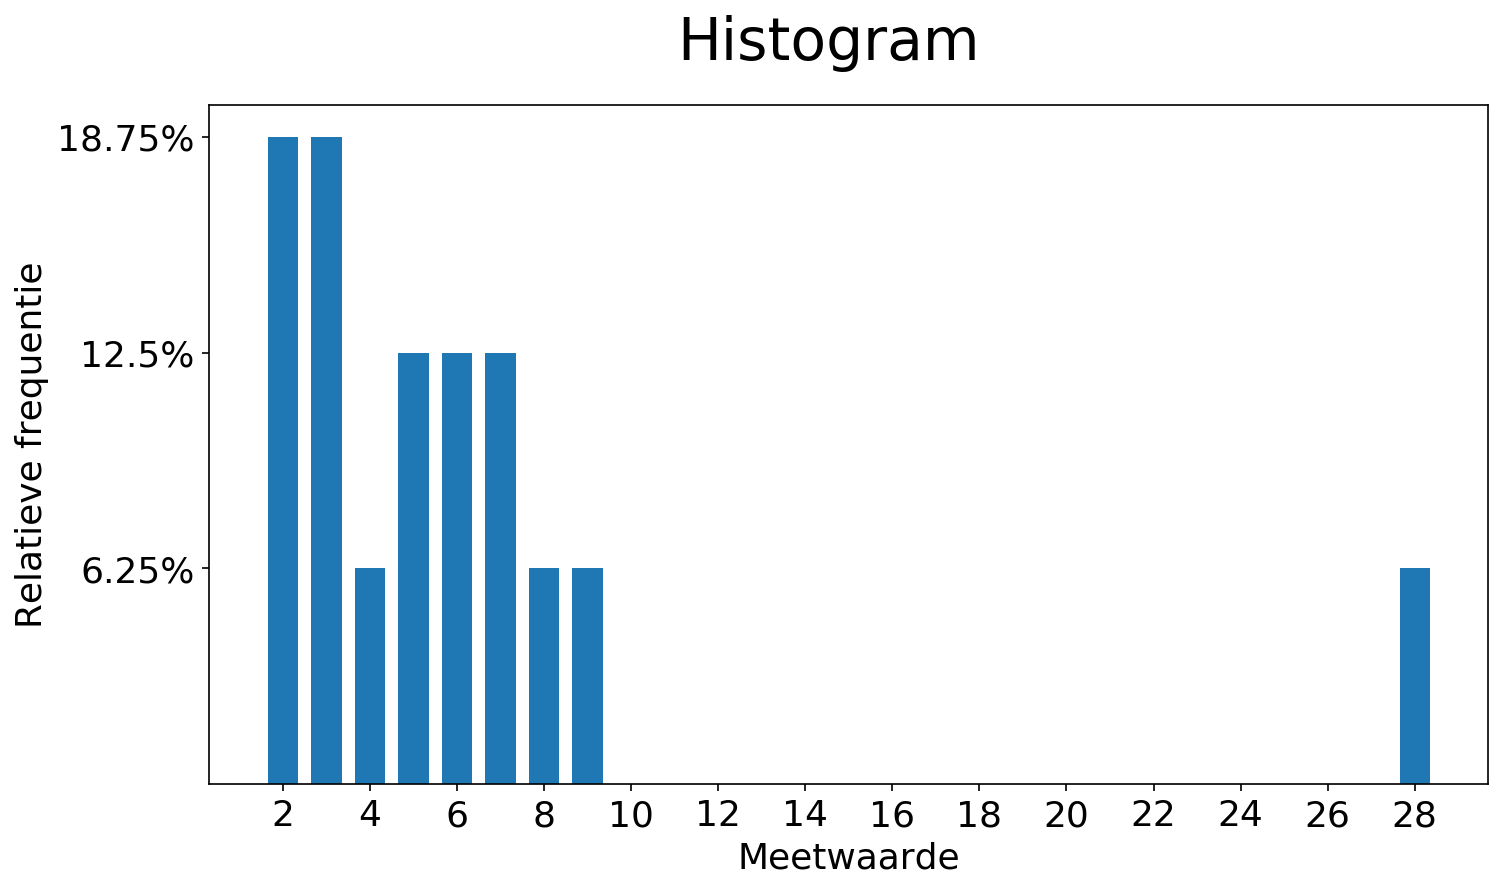

In [4]:
fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
plt.hist(S, bins=(max(S)-min(S)), rwidth=.7, align='left')

plt.xlabel("Meetwaarde")
plt.xticks(np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28]))

plt.ylabel("Relatieve frequentie")
ytick_list = np.array([1,2,3])
ytick_list_freq = (ytick_list/len(S)*100).astype(str) + np.char.array(['%','%','%'])
plt.yticks(ytick_list, ytick_list_freq)

fig.suptitle("Histogram", fontsize=28)

plt.savefig("png/frequentie_verdeling.png")
plt.show()

## Normaalverdeling

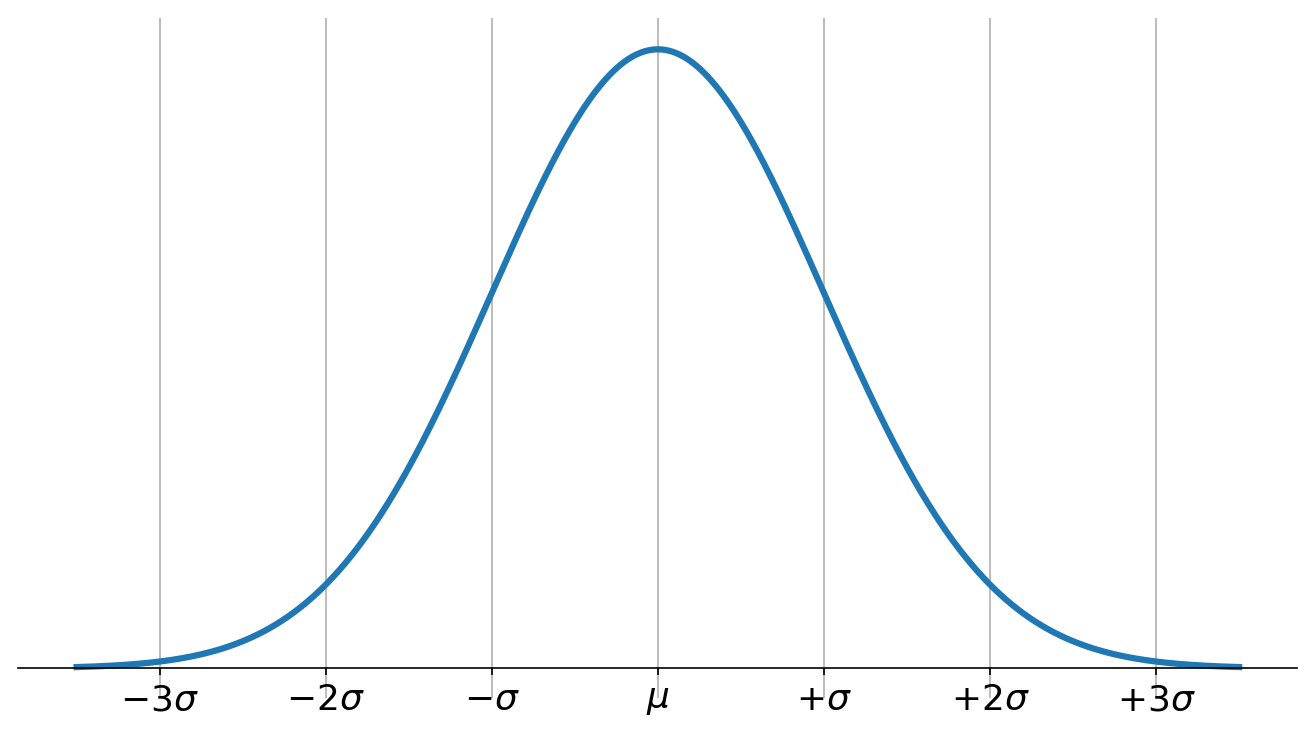

In [5]:
# Schets de verdeling 
mu, sigma = 0, 1

# grafiekgebied
x = np.linspace(-3.5*sigma, 3.5*sigma, 1000)
nv = stats.norm(loc=mu, scale=sigma)   
y = nv.pdf(x)

fig = plt.figure(figsize=fsize, dpi=fdpi)
ax = fig.gca()
plt.plot(x,y, linewidth=3)


# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

ax.set_xticks([-3*sigma, -2*sigma, -sigma, mu, sigma, 2*sigma, 3*sigma])
ax.set_xticklabels(["$-3\sigma$", "$-2\sigma$", "$-\sigma$", "$\mu$", "$+\sigma$", "$+2\sigma$", "$+3\sigma$"])
plt.yticks([])
plt.grid()

plt.savefig("png/normaalverdeling.png")

## Standaardnormaalverdeling

De standaardnormaalverdeling heeft gemiddelde $mu = 0$ en standaardafwijking $sigma = 1$.

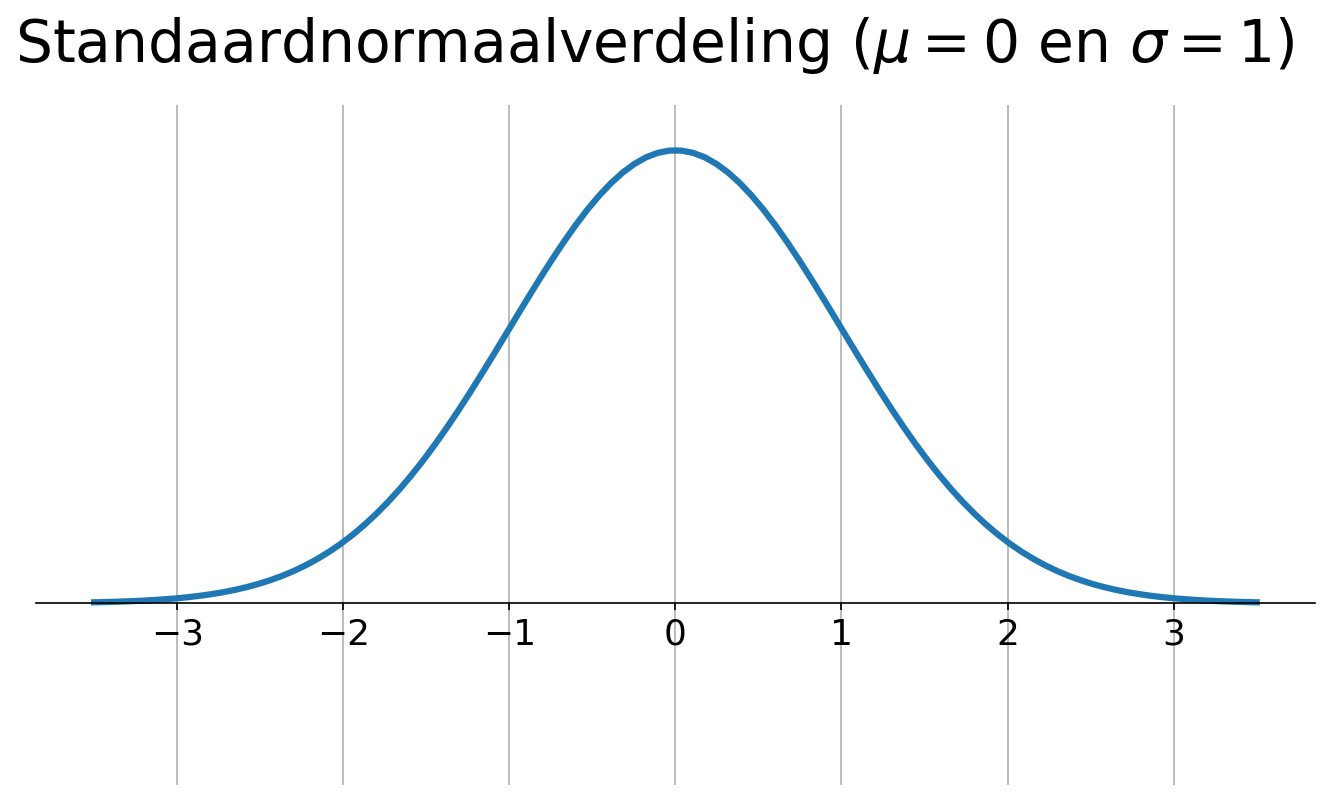

In [6]:
# Formule van de verdeling
mu, sigma = 0, 1
nv = stats.norm(loc=mu, scale=sigma)

x = np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)
y = nv.pdf(x)

# Creeer figuur
fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
ax.set_ylim(-.4*nv.pdf(mu), 1.1*nv.pdf(mu))

# Waarden op x-as plaatsen 
ax.set_xticks(np.arange(mu-3*sigma, mu+4*sigma, sigma))

# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

# Grid toevoegen
ax.grid()

# Titel toevoegen
fig.suptitle("Standaardnormaalverdeling ($\mu = " + str(mu) + "$ en $\sigma = " + str(sigma) + "$)", fontsize=28)

ax.plot(x, y, linewidth=3)

# Opslaan in bestand
plt.savefig("png/normaalverdeling_standaard.png")

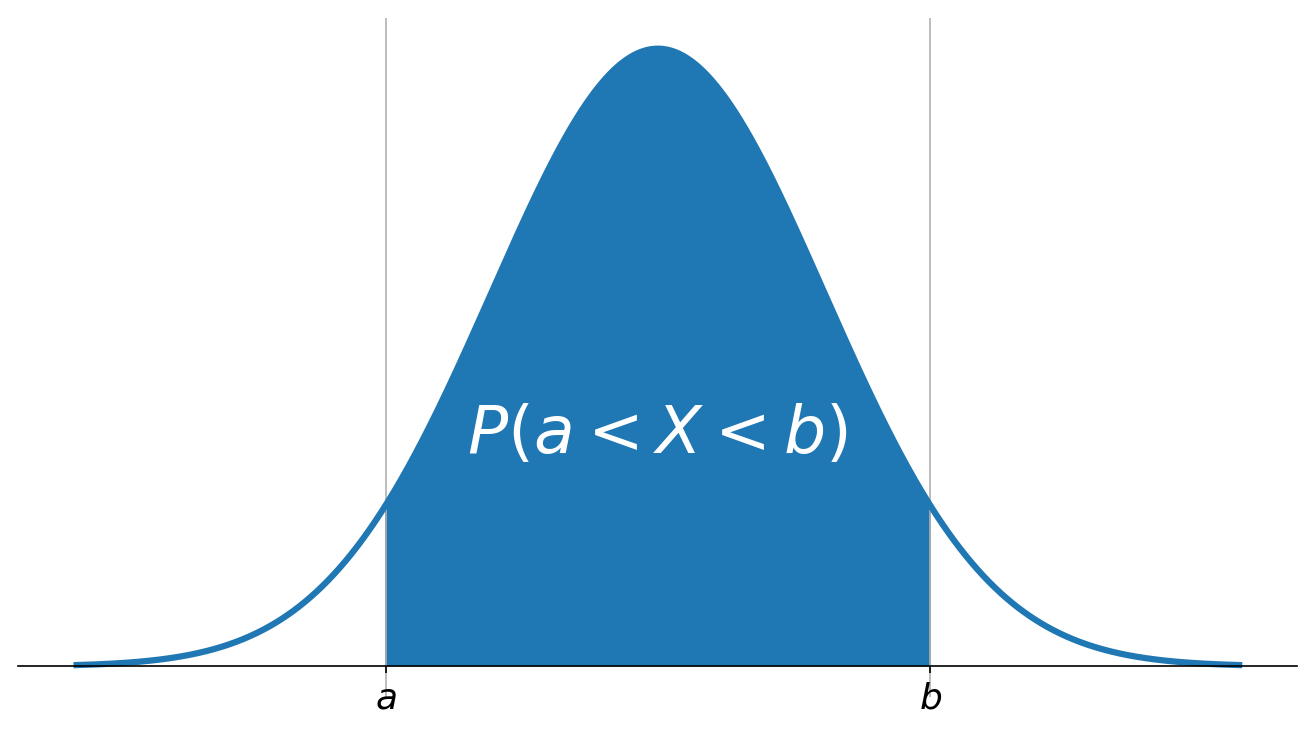

In [7]:
perc = 90
lgrens_perc = (1-perc/100)/2
lgrens = round(nv.ppf(lgrens_perc), 2)
rgrens_perc = 1-(1-perc/100)/2
rgrens = round(nv.ppf(rgrens_perc), 2)
#print(str(perc) + "% van de waardes ligt tussen de " + str(lgrens) + " en de " + str(rgrens) + " standaardafwijkingen")

# Schets de verdeling 
mu, sigma = 0, 1

# grafiekgebied
x = np.linspace(-3.5*sigma, 3.5*sigma, 1000)
nv = stats.norm(loc=mu, scale=sigma)   
y = nv.pdf(x)

fig = plt.figure(figsize=fsize, dpi=fdpi)
ax = fig.gca()
plt.plot(x,y, linewidth=3)

plt.fill_between(x, y, where=(y > nv.pdf(nv.ppf(lgrens_perc))))


# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

ax.set_xticks([lgrens*sigma, rgrens*sigma])
ax.set_xticklabels(["$a$", "$b$"])
plt.yticks([])
plt.grid()
ax.text(0, 0.15,"$P(a < X < b)$", fontsize=32, color='white', horizontalalignment='center', verticalalignment='center')

plt.savefig("png/normaalverdeling_kans.png")


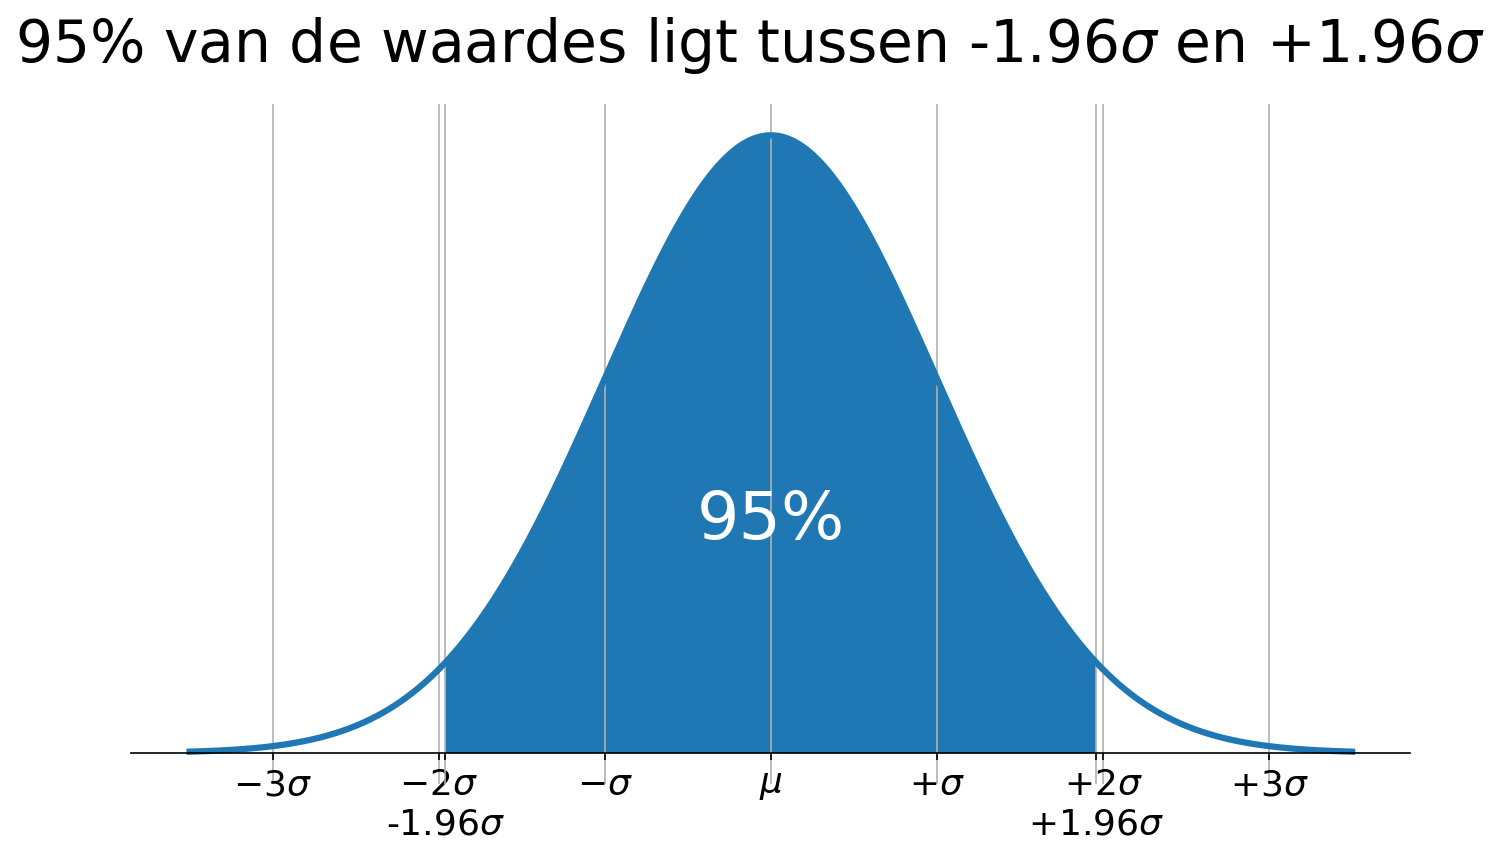

In [8]:
perc = 95
lgrens_perc = (1-perc/100)/2
lgrens = round(nv.ppf(lgrens_perc), 2)
rgrens_perc = 1-(1-perc/100)/2
rgrens = round(nv.ppf(rgrens_perc), 2)
#print(str(perc) + "% van de waardes ligt tussen de " + str(lgrens) + " en de " + str(rgrens) + " standaardafwijkingen")

# Schets de verdeling 
mu, sigma = 0, 1

# grafiekgebied
x = np.linspace(-3.5*sigma, 3.5*sigma, 1000)
nv = stats.norm(loc=mu, scale=sigma)   
y = nv.pdf(x)

fig = plt.figure(figsize=fsize, dpi=fdpi)
ax = fig.gca()
plt.plot(x,y, linewidth=3)

plt.fill_between(x, y, where=(y > nv.pdf(nv.ppf(lgrens_perc))))


# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

ax.set_xticks([-3*sigma, -2*sigma, lgrens*sigma, -sigma, mu, sigma, rgrens*sigma, 2*sigma, 3*sigma])
ax.set_xticklabels(["$-3\sigma$", "$-2\sigma$", "\n" + str(lgrens) + "$\sigma$", "$-\sigma$", "$\mu$", "$+\sigma$", "\n+" + str(rgrens) + "$\sigma$", "$+2\sigma$", "$+3\sigma$"])
plt.yticks([])
plt.grid()
ax.text(0, 0.15, str(perc)+"%", fontsize=32, color='white', horizontalalignment='center', verticalalignment='center')
fig.suptitle(str(perc) + "% van de waardes ligt tussen " + str(lgrens) + "$\sigma$ en +" + str(rgrens) + "$\sigma$", fontsize=28)

plt.savefig("png/normaalverdeling_" + str(perc) + ".png")


In [9]:
nv.ppf(.95)

1.6448536269514722

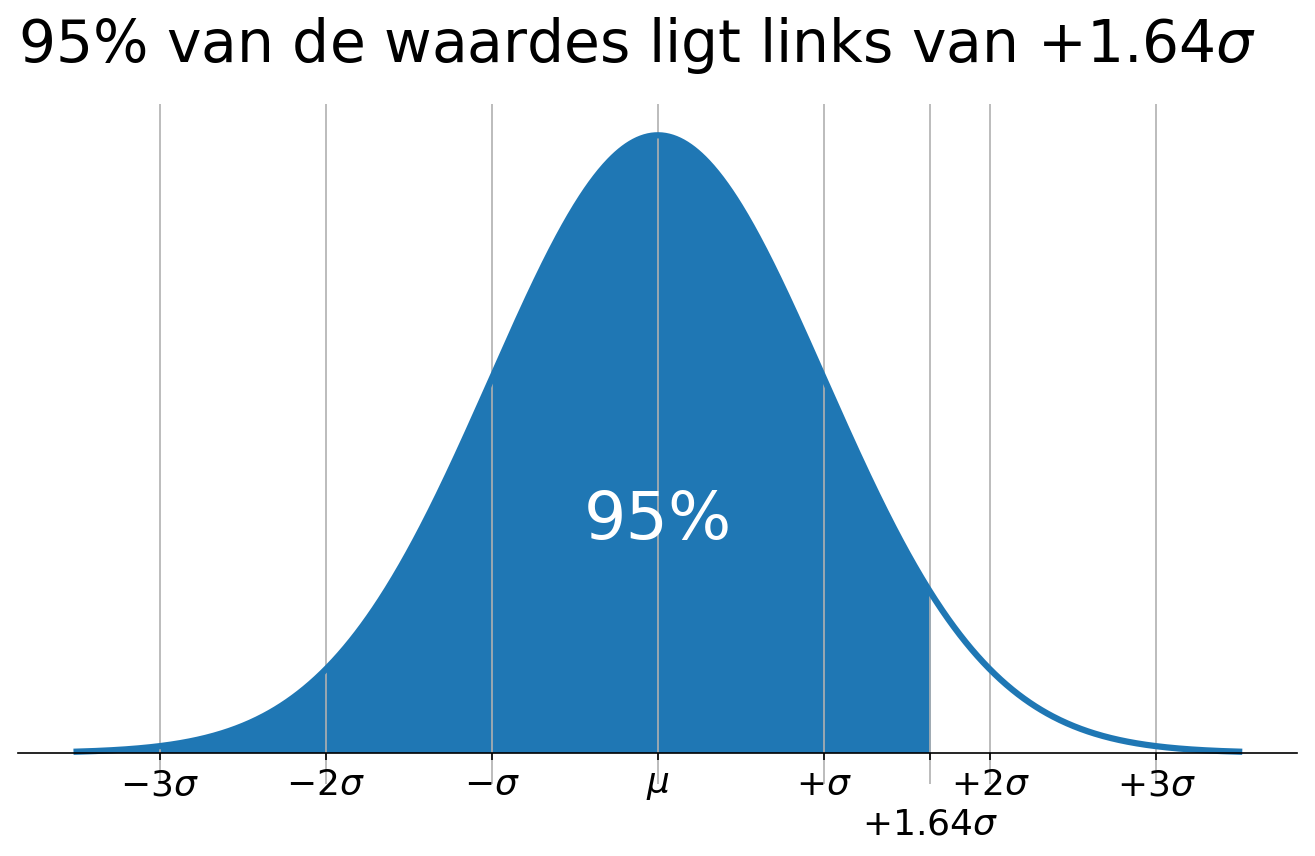

In [10]:
perc = 95
rgrens = round(nv.ppf(perc/100), 2)
#print(str(perc) + "% van de waardes ligt tussen de " + str(lgrens) + " en de " + str(rgrens) + " standaardafwijkingen")

# Schets de verdeling 
mu, sigma = 0, 1

# grafiekgebied
x = np.linspace(-3.5*sigma, 3.5*sigma, 1000)
nv = stats.norm(loc=mu, scale=sigma)   
y = nv.pdf(x)

fig = plt.figure(figsize=fsize, dpi=fdpi)
ax = fig.gca()
plt.plot(x,y, linewidth=3)

plt.fill_between(x, y, where=(x < nv.ppf(perc/100)))


# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

ax.set_xticks([-3*sigma, -2*sigma, -sigma, mu, sigma, rgrens*sigma, 2*sigma, 3*sigma])
ax.set_xticklabels(["$-3\sigma$", "$-2\sigma$", "$-\sigma$", "$\mu$", "$+\sigma$", "\n+" + str(rgrens) + "$\sigma$", "$+2\sigma$", "$+3\sigma$"])
plt.yticks([])
plt.grid()
ax.text(0, 0.15, str(perc)+"%", fontsize=32, color='white', horizontalalignment='center', verticalalignment='center')
fig.suptitle(str(perc) + "% van de waardes ligt links van +" + str(rgrens) + "$\sigma$", fontsize=28)

plt.savefig("png/normaalverdeling_rzijdig_" + str(perc) + ".png")


## Formules voor normaalverdeling

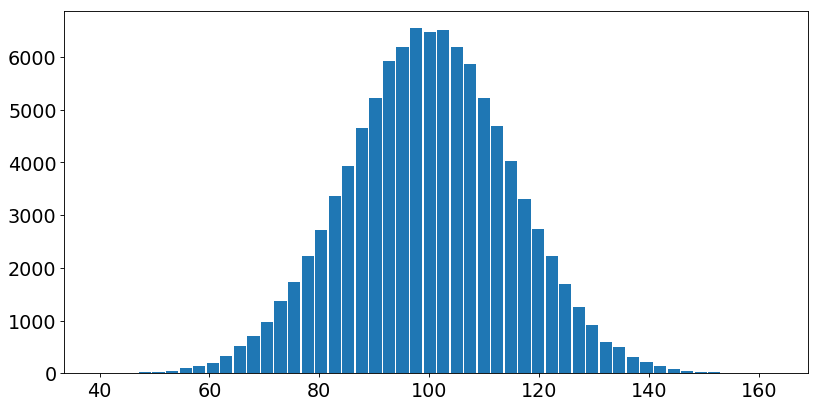

In [11]:
# gemiddelde en standaarddeviatie
mu, sigma = 100, 15

# 100.000 meetwaarden, normaal verdeeld 
y = mu + sigma * np.random.randn(100000)

# omzetten naar een verdeling van 50 'bins'
hist, bins = np.histogram(y, bins=50)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# opbouwen grafiek
plt.figure(figsize=(12,6), dpi=80)

plt.bar(center, hist, align='center', width=width)
plt.show()

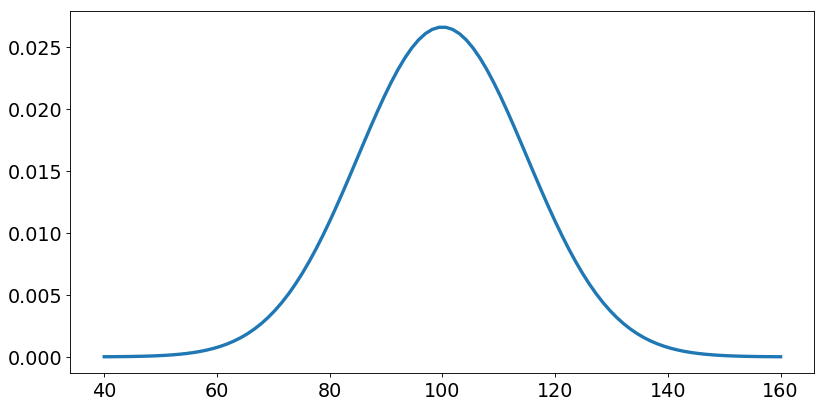

In [12]:
# Normale verdeling - wiskundige formule

# gemiddelde en standaarddeviatie
mu, sigma = 100, 15
x = np.linspace(40,160,100)

# wiskundige formule
y = np.exp( (-1*(x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

plt.figure(figsize=(12,6), dpi=80)
plt.plot(x,y,linewidth=3)
plt.show()

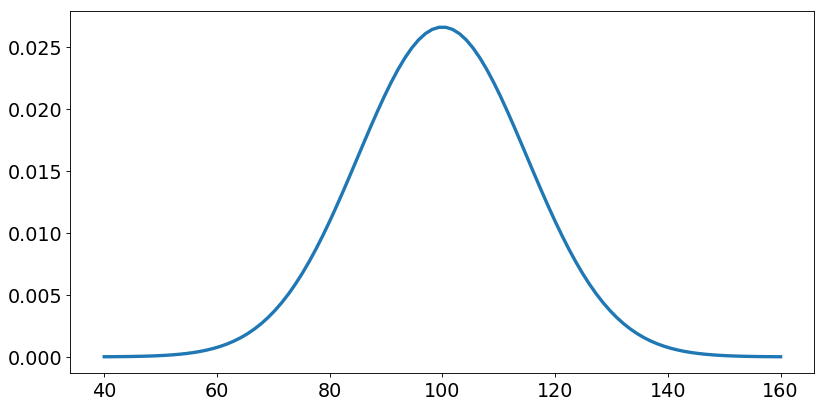

In [13]:
# Normale verdeling - scipy.stats functies

# gemiddelde en standaarddeviatie
mu, sigma = 100, 15
x = np.linspace(40,160,100)

# scipy.stats functies
nv = stats.norm(loc=mu, scale=sigma)
y = nv.pdf(x)

plt.figure(figsize=(12,6), dpi=80)
plt.plot(x,y,linewidth=3)
plt.show()

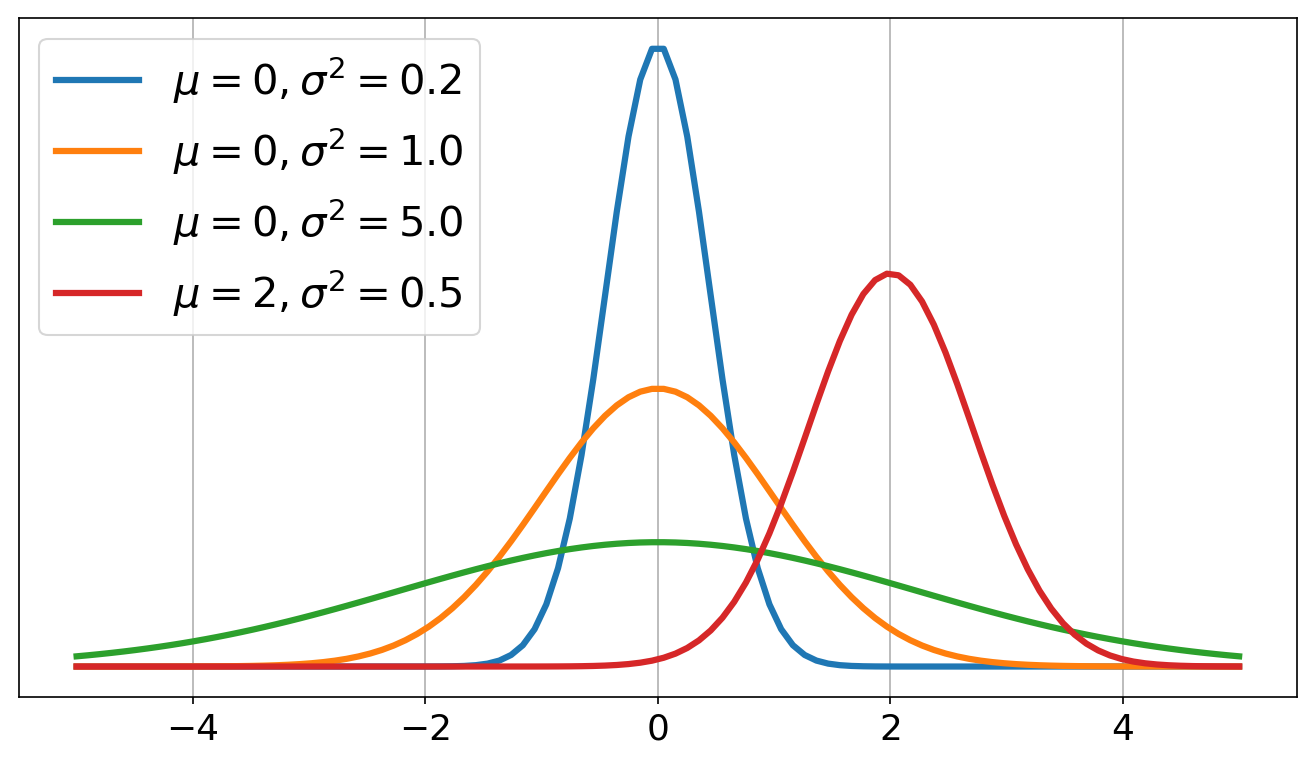

In [14]:
# Normale verdeling - scipy.stats formules 

x = np.linspace(-5,5,100)

nv1 = stats.norm(loc=0, scale=np.sqrt(.2))
nv2 = stats.norm(loc=0, scale=np.sqrt(1.))
nv3 = stats.norm(loc=0, scale=np.sqrt(5.))
nv4 = stats.norm(loc=2, scale=np.sqrt(0.5))

y1 = nv1.pdf(x)
y2 = nv2.pdf(x)
y3 = nv3.pdf(x)
y4 = nv4.pdf(x)

fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)

ax.plot(x, y1, linewidth=3, label='$\mu = 0, \sigma^2 = 0.2$')
ax.plot(x, y2, linewidth=3, label='$\mu = 0, \sigma^2 = 1.0$')
ax.plot(x, y3, linewidth=3, label='$\mu = 0, \sigma^2 = 5.0$')
ax.plot(x, y4, linewidth=3, label='$\mu = 2, \sigma^2 = 0.5$')

ax.get_yaxis().set_visible(False)

ax.grid()
ax.legend(fontsize=20)

plt.savefig("png/normaalverdeling_vglk.png")


## Normaalverdeling in de praktijk

Een voorbeeld van een normaalverdeling in de praktijk is de verdeling van IQ over de populatie. Deze is normaalverdeeld met gemiddelde $mu = 100$ en standaardafwijking $sigma = 15$ (en is dus _niet_ standaard normaalverdeeld).

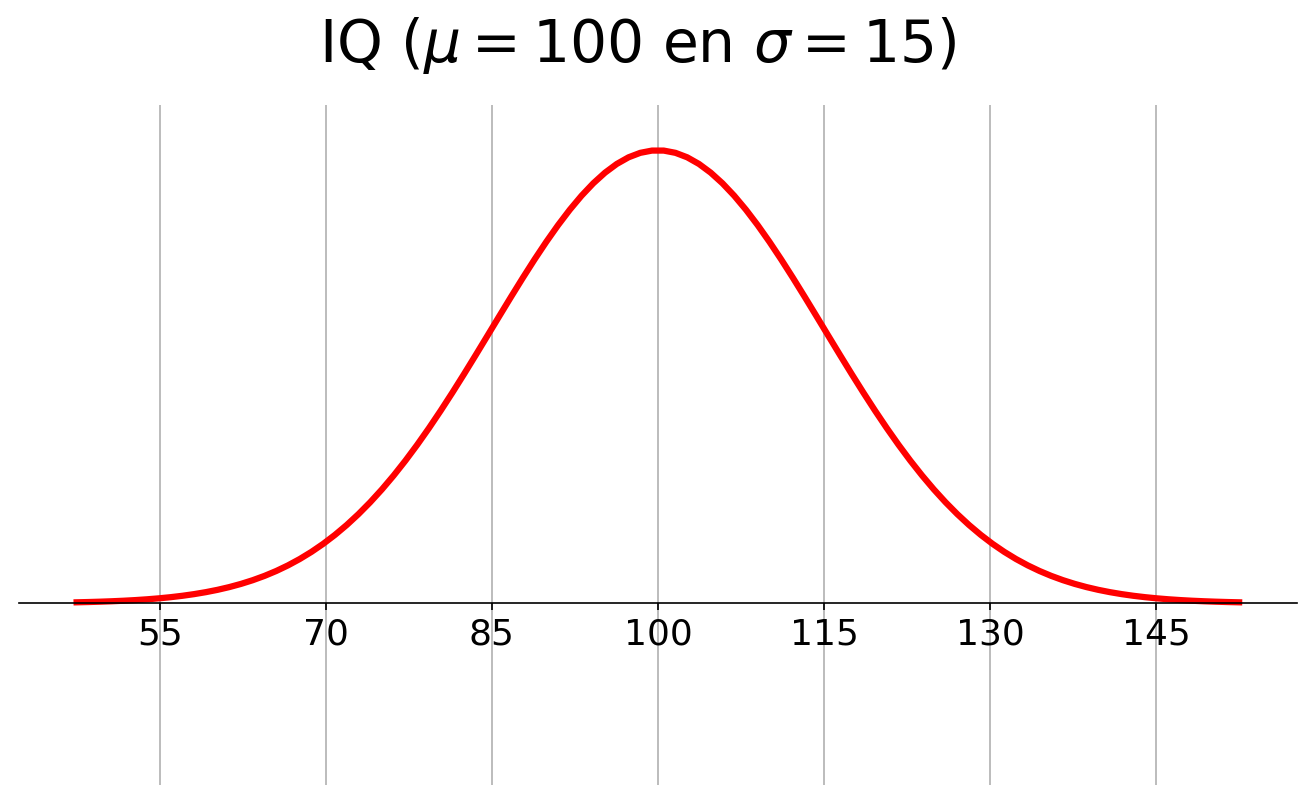

In [15]:
# Formule van de verdeling
mu, sigma = 100, 15
nv = stats.norm(loc=mu, scale=sigma)

x = np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)
y = nv.pdf(x)

# Creeer figuur
fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
ax.set_ylim(-.4*nv.pdf(mu), 1.1*nv.pdf(mu))

# Waarden op x-as plaatsen 
ax.set_xticks(np.arange(mu-3*sigma, mu+4*sigma, sigma))

#ax.set_xticklabels(["$\mu-3\sigma$", "$\mu-2\sigma$", "$\mu-\sigma$", "$\mu$", "$\mu+\sigma$", "$\mu+2\sigma$", "$\mu+3\sigma$"])
#ax.set_xticklabels(["$\mu-3\sigma$ \n 99.73%", "$\mu-2\sigma$ \n 95.45%", "$\mu-\sigma$ \n 68.27%", "$\mu$", "$\mu+\sigma$", "$\mu+2\sigma$", "$\mu+3\sigma$"])

# Assen aanpassen
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_position('zero') 
ax.get_yaxis().set_visible(False)

# Grid toevoegen
ax.grid()

# Titel toevoegen
fig.suptitle("IQ ($\mu = " + str(mu) + "$ en $\sigma = " + str(sigma) + "$)", fontsize=28)

ax.plot(x, y, linewidth=3, color='red')

# Opslaan in bestand
plt.savefig("png/normaalverdeling_iq.png")

## Voorbeeld. Bananen

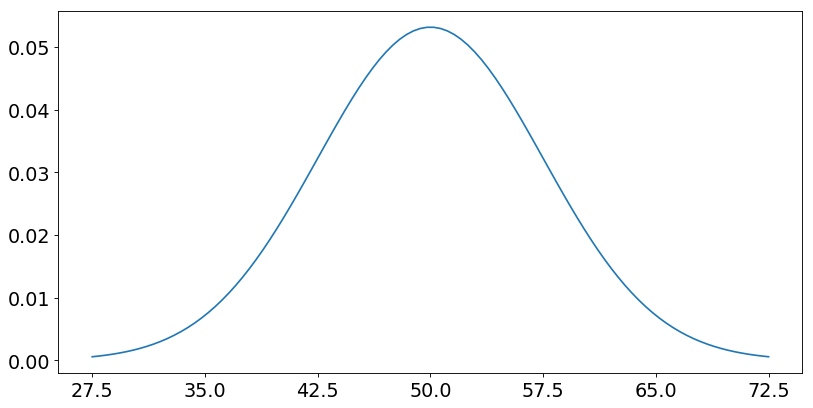

In [16]:
# Normale verdeling - bananen

mu, sigma = 50, 7.5

# scipy.stats functies
banaanverdeling = stats.norm(loc=mu,scale=sigma)

# x tussen mu - 3 * sd en mu + 3 * sd
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = banaanverdeling.pdf(x)

plt.figure(figsize=(12,6), dpi=80)

plt.plot(x,y)
# set x-ticks
plt.xticks(np.linspace(mu-3*sigma,mu+3*sigma,7))

plt.show()

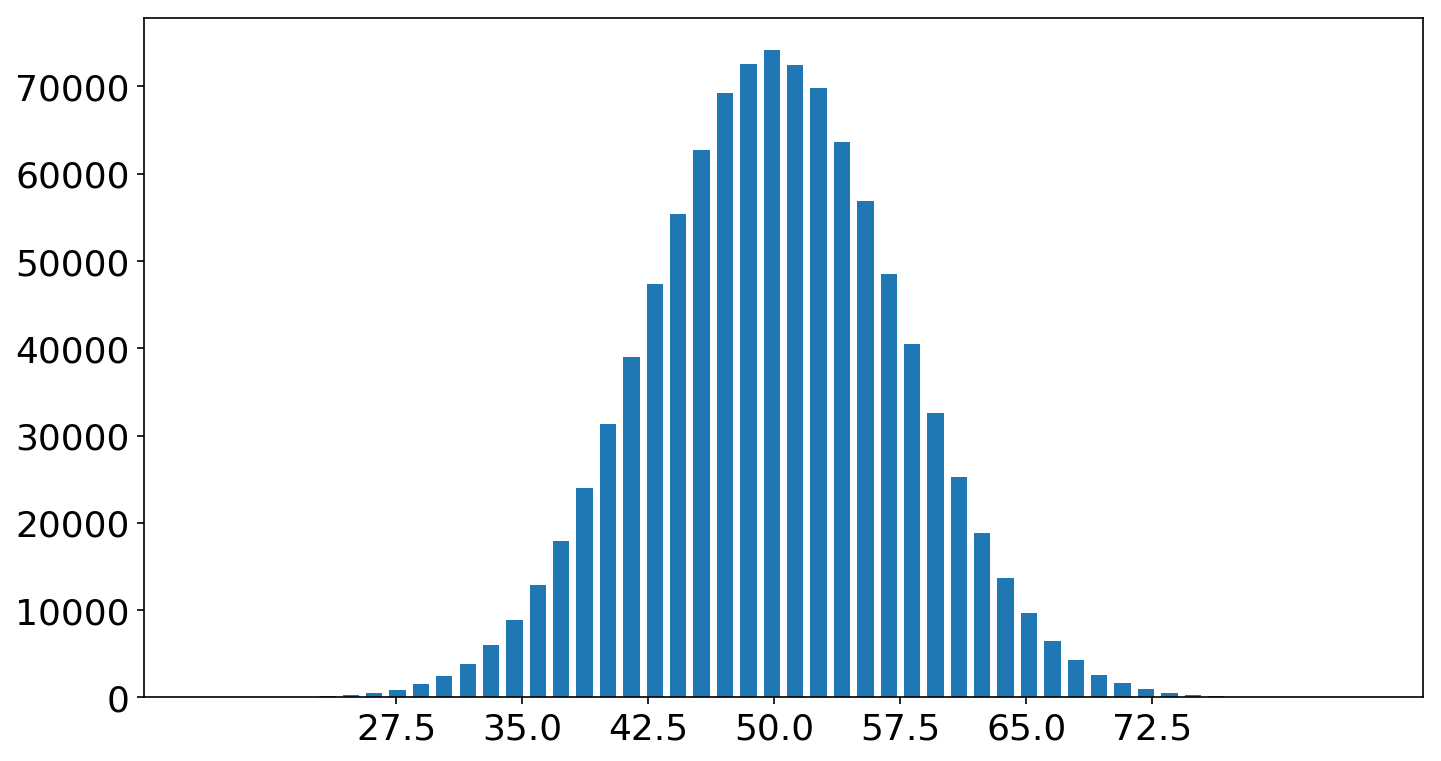

In [17]:
# Geef een miljoen punten verdeeld volgens deze normaalverdeling
points = banaanverdeling.rvs(size=1000000)

# Histogram van de punten
fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
hist, bins = np.histogram(points, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.xticks(np.linspace(mu-3*sigma,mu+3*sigma,7))  #, ('$\mu-3\sigma$', '$\mu-2\sigma$', '$\mu-\sigma$', '$\mu$', '$\mu+\sigma$', '$\mu+2\sigma$','$\mu+3\sigma$'))
plt.bar(center, hist, align='center', width=width)
plt.show()

C:\Users\tijmen.muller\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


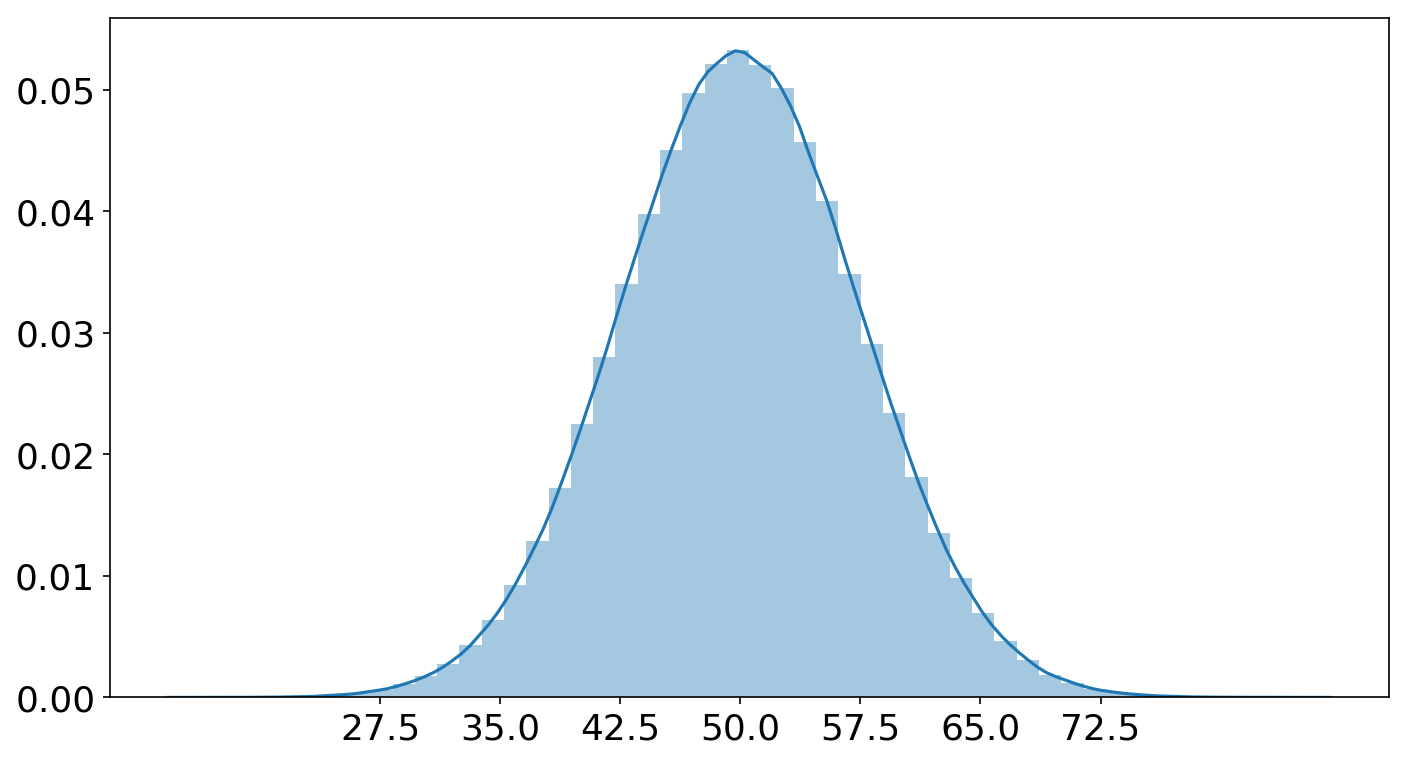

In [24]:
# Histogram met Seaborn
import seaborn as sns

fig, ax = plt.subplots(figsize=fsize, dpi=fdpi)
sns.distplot(points)
plt.xticks(np.linspace(mu-3*sigma,mu+3*sigma,7)) #, ('$\mu-3\sigma$', '$\mu-2\sigma$', '$\mu-\sigma$', '$\mu$', '$\mu+\sigma$', '$\mu+2\sigma$','$\mu+3\sigma$'))

plt.show()

In [19]:
print("{:.1f}% van de bananen weegt minder dan 40g.".format(banaanverdeling.cdf(40)*100))
print("{:.1f}% van de banenen weegt meer dan 65g.".format(100-banaanverdeling.cdf(65)*100))
print("{:.1f}% van de banenen weegt meer dan 65g.".format(banaanverdeling.sf(65)*100))
print("{:.1f}% van de bananen weegt tussen de 40 en de 65g.\n".format((banaanverdeling.cdf(65)-banaanverdeling.cdf(40))*100))

print("De lichtste kwart van de bananen zijn lichter dan {:.1f}g.".format(banaanverdeling.ppf(.25)))
print("De zwaarste kwart van de bananen zijn zwaarder dan {:.1f}g.".format(banaanverdeling.isf(.25)))
print("De middelste tiende van de banenen weegt tussen de {:.1f}g en de {:.1f}g.".format(banaanverdeling.ppf(.45),banaanverdeling.isf(.45)))


9.1% van de bananen weegt minder dan 40g.
2.3% van de banenen weegt meer dan 65g.
2.3% van de banenen weegt meer dan 65g.
88.6% van de bananen weegt tussen de 40 en de 65g.

De lichtste kwart van de bananen zijn lichter dan 44.9g.
De zwaarste kwart van de bananen zijn zwaarder dan 55.1g.
De middelste tiende van de banenen weegt tussen de 49.1g en de 50.9g.


## Normale verdeling met Scipy

In [20]:
# Berekening van waarde naar kans
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)
print(nv.cdf(mu - 1.96*sigma))   # 35,3 gram
print(nv.cdf(mu + 1.96*sigma))   # 64,7 gram
print(nv.cdf(mu + 1.96*sigma) - nv.cdf(mu - 1.96*sigma))

0.024997895148220397
0.9750021048517796
0.9500042097035593


In [30]:
# Berekening van kans naar waarde
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)
print(nv.ppf(0.025))   # 2,5%
print(nv.ppf(0.975))   # 97,5%

print("90% weegt tussen de", nv.ppf(0.05), "en", nv.ppf(0.95), "gram")
print("90% weegt tussen de", mu-1.64*sigma, "en", mu+1.64*sigma, "gram")
print()
print("99% weegt tussen de", nv.ppf(0.005), "en", nv.ppf(0.995), "gram")
print("99% weegt tussen de", mu-2.58*sigma, "en", mu+2.58*sigma, "gram")
print()
print("5% weegt meer dan", nv.ppf(0.95), "gram")
print("5% weegt meer dan", mu+1.64*sigma, "gram")
print()
print("5% weegt minder dan", nv.ppf(0.05), "gram")
print("5% weegt minder dan", mu-1.64*sigma, "gram")
print()
print("95% weegt minder dan", nv.ppf(0.95), "gram")
print("95% weegt minder dan", mu+1.64*sigma, "gram")



35.30027011594959
64.69972988405041
90% weegt tussen de 37.66359779786396 en 62.33640220213604 gram
90% weegt tussen de 37.7 en 62.3 gram

99% weegt tussen de 30.681280223383244 en 69.31871977661675 gram
99% weegt tussen de 30.65 en 69.35 gram

5% weegt meer dan 62.33640220213604 gram
5% weegt meer dan 62.3 gram

5% weegt minder dan 37.66359779786396 gram
5% weegt minder dan 37.7 gram

95% weegt minder dan 62.33640220213604 gram
95% weegt minder dan 62.3 gram
